Some Popular Tasks Regarding Text Processing:

* **Language Translation** - Translation of a sentence from one language to another
* **Sentiment Analysis** - To determine whether the sentiment towards any topic or product is positive, negative or neutral, based on a corpus of text
* **Spam Filtering** - To detect unsolicited and unwanted email/messages

In this notebook, we'll discuss the steps involved in text processing.

# Data Preprocessing
***
The data preprocessing steps could include:
* **Tokenization** - converting sentences to words
* Removing unnecessary punctuation and tags
* Removing stop words
* Stemming - Removing inflection via dropping unnecessary characters (usually a suffix)
* Lemmatization - Removing inflection by determining the part of speech and utilized a detailed database of the language

Stemming is the poor man's lemmatization

```text
The stemmed form of studies is: studi
The stemmed form of studying is: study

The lemmatized form of studies is: study
The lemmatized form of studying is: study
```

We can use the `nltk` library to do a lot of text preprocessing:
## Tokenization
***

In [7]:
import nltk
from nltk.tokenize import word_tokenize

text = "The quick brown fox jumps over the lazy dog"
tokens = word_tokenize( text )
print(tokens)

['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']


## Removing Stopwords
***
We can use `nltk` to remove stop words (words containing no semantic value)

If you need to download the stopwords for `nltk`, you need to run:
```python
nltk.download("stopwords")
```

In [8]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))
tokens = [token for token in tokens if token not in stop_words]
print(tokens)

['The', 'quick', 'brown', 'fox', 'jumps', 'lazy', 'dog']


## Stemming
***
`nltk` also provides several stemmer interfaces like Porter stemmer, Lancaster stemmer and snowball stemmer:

In [3]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
stems = []
for token in tokens:
    stems.append(stemmer.stem(token))
print(stems)

['the', 'quick', 'brown', 'fox', 'jump', 'lazi', 'dog']


# Feature Extraction
***
In text processing, words represent discrete, categorical features. How do we encode this categorical data in a way that is ready to be used by the algorithms? One of the simples techniques is the **bag of words** featurization.

## Bag of Words (BOW)
***
We make a **list of unique words** in the corpus, called the **vocabulary**. Then each word in the vocabulary gets its own basis vector. Then a sentence, or each document in the corpus is represented by a vector that is equal to the vector sums of the basis vectors for the words appearing in that sentence. 

This leads us to the **Term Frequency-Inverse Document Frequency (TF-IDF)** technique:

## TF-IDF
***
First, let us clarify what is meant by document. A corpus is made up of many documents. So if your corpus is a set of tweets, each document is a tweet. So we can ask for the word vector of an entire tweet. The word vector of an entire tweet would be some function of the word vectors of its constituent words.

$$\textrm{Term Frequency (TF)} = \frac{\textrm{number of times token appears in single document}}{\textrm{number of tokens in single document}}$$

$$\textrm{Inverse Document Frequency (IDF)} = \log\left(\frac{\textrm{total number documents}}{\textrm{number of documents this token appears in}}\right)$$

$$\textrm{TF-IDF} = (\textrm{TF})(\textrm{IDF})$$

Here is an example of calculating the TF-IDF of a term in a document:

```text
tweet_one = "This is a beautiful beautiful day day day day day"
tweet_two = "This is a beautiful night night"
```

Then we would have that:
```text
TF("beautiful",tweet_one) = 2/10
TF("day", tweet_one) = 5/10
IDF("beautiful") = log(2/2) = 0
IDF("day") = log(2/1) = 0.3

TF_IDF("beautiful", tweet_one) = (2/10)(0)=0
TF_IDF("day", tweet_one) = (5/10)(0.30) = 0.15
```

So we see that for the first tweet, the TF-IDF method heavily penalizes the word "beautiful", but assigns greater weight to "day". "beautiful" gives no power of resolution because it appears in both documents. "day" is an important word for `tweet_one` in the context of the entire corpus (it only appears in one of the two tweets). 

`scikit-learn` provides efficient tools for computing the TF-IDF of a corpus.

One of the major disadvantages of using the bag of words featurization is that it discards all information contained in the word order of the vectors. 

To solve this problem, we use an approach called **Word Embedding**
## Word Embedding
***
A word embedding is a numerical representation of text where words that have similar semantic meaning are geometrically closer in their semantic vector space. 

### Word2Vec
***
Word2Vec takes a corpus of text and produces a vector space that has the property that vectors that are geometrically close also share common semantic contexts in the corpus. 

### Glove
***
The **Global Vectors for Word Representation** algorithm is an extension to the Word2Vec model. GloVe constructs a co-occurrence matrix on the whole text corpus. The entries of this matrix are the probabilities that a given token appears in the common of every other word in the vocabulary. This assumes the **distributional hypothesis**.

# Choosing ML Algorithms
***
Classical ML approaches such as Naive bayes or Support Vector machines for spam filtering are very popular. However, Deep Learning techniques, combined with deep-learned word embeddings are taking the NLP stage by storm.

# Example IMDB Movie Review Sentiment Analyzer
***
We will now build a sentiment analyzer over the IMDB movie review dataset. 

We will be performing binary classification (negative or positive reviews).

Our dataset can be downloaded [here](http://ai.stanford.edu/~amaas/data/sentiment/).

The dataset contains 25000 training reviews and 25000 testing reviews. 

## Loading the Data
***
The data is separated into test/pos, test/neg, train/pos, train/neg folders containing text files for each review. We need to load all of these reviews into a dataframe so we can do stuff with it. 

In [1]:
import pandas as pd
import logging
import os

logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s",
                    level=logging.INFO)

folder = "data/imdb_movie_reviews/"
labels = {'pos': 1, 'neg': 0}

data = pd.DataFrame()
i = 0
for dataset in ["test", "train"]:
    for polarity in ["pos", "neg"]:
        preliminary_path = os.path.join(folder, dataset, polarity)
        for file in os.listdir(preliminary_path):
            full_file_name = os.path.join(preliminary_path, file)
            with open(full_file_name, 'r', encoding='utf-8') as fileHandle:
                review_text = fileHandle.read()
                review = pd.DataFrame(
                    [{"review": review_text, "sentiment": labels[polarity]}])
            i += 1
            data = data.append(review, ignore_index=True)
            if (i % 10000 == 0):
                logging.info("read {} reviews".format(i))

2019-08-13 00:08:28,741 : INFO : read 10000 reviews
2019-08-13 00:08:43,248 : INFO : read 20000 reviews
2019-08-13 00:08:59,773 : INFO : read 30000 reviews
2019-08-13 00:09:19,039 : INFO : read 40000 reviews
2019-08-13 00:09:42,451 : INFO : read 50000 reviews


The data set looks like this:

In [2]:
data.head()

,review,sentiment
0,Original Movie lovers can actually love this s...,1
1,Peak Practice was a British drama series about...,1
2,My wife is a mental health therapist and we wa...,1
3,A fantastic film featuring great Aussie talent...,1
4,Despite all it's trappings of style and cinema...,1


In [3]:
data.sentiment.value_counts()

1    25000
0    25000
Name: sentiment, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null int64
dtypes: int64(1), object(1)
memory usage: 781.3+ KB


## Look at the Frequency of Top Words
***
We can get the frequency distribution of the words in the text by utilizing the `nltk.FreqDist()` function. This function lists the top words used in the text. We can look at the top 50 most frequent words in the text: As you can see, we have a lot of stop words in there. 

In [9]:
# all of the words in the corpus concatenated
reviews = data.review.str.cat(sep=" ")
tokens = word_tokenize(reviews)
vocabulary = set(tokens)
print("Number of unique words in vocabulary: {}".format(len(vocabulary)))
frequency_dist = nltk.FreqDist(tokens)
TOPN = 20
print("Top {} most frequent tokens:".format(TOPN))
print("----------------------------")
for token in sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)[:TOPN]:
    print(token)

Number of unique words in vocabulary: 198758
Top 20 most frequent tokens:
----------------------------
the
,
.
a
and
of
to
is
/
>
<
br
in
I
it
that
's
this
was
The


As you can see, there are almost no words with any real semantic meaning in the most frequent tokens. So we need to do some preprocessing

## Remove Stopwords
***
Now we shall remove stopwords to further clean up the text corpus:

In [15]:
import string
tokens_to_manually_remove = ["br","'s","''","n't","``","..."]
# remove stop words and punctuation
tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation\
         and word not in tokens_to_manually_remove]
frequency_dist = nltk.FreqDist(tokens)
print("Top {} most frequent tokens after removing stop words and punctuation:".format(TOPN))
print("----------------------------")
for token in sorted(frequency_dist, key=frequency_dist.__getitem__, reverse=True)[:TOPN]:
    print(token)

Top 20 most frequent tokens after removing stop words and punctuation:
----------------------------
I
The
movie
film
one
like
It
This
good
would
time
really
see
even
story
much
could
get
people
bad


## Wordcloud Visualization
***
Now we can make a wordcloud visualization.

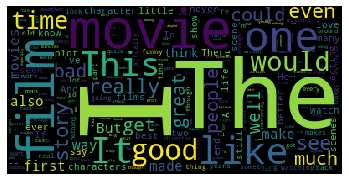

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud().generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Building a Classifier
***
Now we can divide the dataset into a test and training set of 25000 reviews each, appropriately stratified by label:

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data.review,data.sentiment,stratify=data.sentiment,\
                                                   random_state=2019,test_size=0.2)

## Featurization
***
Now we need to actually convert our text into a numerical vector representation. We will use TF IDF from scikit-learn here

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

print(train_vectors.shape, test_vectors.shape)

(40000, 92929) (10000, 92929)


## Black Box Model
***
Now we will use the black box naive bayes model from scikit-learn to create a baseline model for this problem:

In [21]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_vectors, y_train)

## Metrics
***
Now we use the basic accuracy as the metric for our classification, because our classes are balanced.

In [22]:
from sklearn.metrics import classification_report
predictions = clf.predict(test_vectors)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      5000
           1       0.88      0.84      0.86      5000

    accuracy                           0.86     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



In [42]:
test_sample_1 = "This movie is fantastic! I really like it because it is so good!"
test_sample_2 = "Good movie!"
test_sample_3 = "Maybe I like this movie."
test_sample_4 = "Not to my taste, will skip and watch another movie"
test_sample_5 = "if you like action, then this movie might be good for you."
test_sample_6 = "Bad movie!"
test_sample_7 = "Not a good movie!"
test_sample_8 = "This movie really sucks! Can I get my money back please?"
test_samples = [test_sample_1, test_sample_2, test_sample_3, test_sample_4, test_sample_5, test_sample_6,
               test_sample_7, test_sample_8]


sample_vectors = vectorizer.transform(test_samples)
print("Sentiment: {}".format(clf.predict(sample_vectors)))

Sentiment: [1 0 0 0 0 0 0 0]


In [37]:
print(sample_vectors.toarray().shape)

(8, 92929)


# An Improved Sentiment Classifier using Deep Learning
***

The architecture for the deep learning text classification model generally consists of the following connected components:

Text(X) -> Embedding -> Deep Network (LSTM/GRU) -> Fully Connected (Dense) -> Output Layer (Softmax) -> Sentiment (y)

## Clean the Text for Embedding Layer
***
The word embeddings can be learned while training a neural network on the classification problem. Before it can be presented to the network, the text data is encoded so that each word is represented by a unique integer. This can be performed using the **Tokenizer API** provided by **Keras**. 

We also add padding to make all of the vectors the same length. 

In [59]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(data.review.values)

max_length = data.review.apply(lambda review: len(review.split())).max(axis=0)
print("Maximum length of any review: {}".format(max_length))

# define vocabulary size
vocab_size = len(tokenizer.word_index) + 1

train_tokens = tokenizer.texts_to_sequences(x_train.values)
test_tokens = tokenizer.texts_to_sequences(x_test.values)

x_train_padded = pad_sequences(train_tokens, maxlen=max_length, padding="post")
x_test_padded = pad_sequences(test_tokens, maxlen=max_length, padding="post")

Maximum length of any review: 2470


In [60]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, GRU
from keras.layers.embeddings import Embedding

# dimension of semantic word vector space
EMBEDDING_DIM = 100

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_length))
model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam", metrics=["accuracy"])
print(model.summary())

Using TensorFlow backend.
2019-08-13 00:48:10,908 : WARNING : From /home/joseph/miniconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py:263: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.
2019-08-13 00:48:10,967 : WARNING : From /home/joseph/miniconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2470, 100)         12425300  
_________________________________________________________________
gru_1 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 12,438,101
Trainable params: 12,438,101
Non-trainable params: 0
_________________________________________________________________
None


Now we can fit the model using our training data and some hyperparameters.

In [67]:
model.fit(x_train_padded, y_train.values,batch_size=64, epochs=25, \
          validation_data=(x_test_padded,y_test.values), verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 2429s 61ms/step - loss: 0.6936 - acc: 0.4959 - val_loss: 0.6933 - val_acc: 0.5000
Epoch 2/25
40000/40000 [==============================] - 2418s 60ms/step - loss: 0.6933 - acc: 0.5004 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 3/25
40000/40000 [==============================] - 2414s 60ms/step - loss: 0.6933 - acc: 0.5013 - val_loss: 0.6935 - val_acc: 0.5000
Epoch 4/25
40000/40000 [==============================] - 2417s 60ms/step - loss: 0.6933 - acc: 0.5023 - val_loss: 0.6936 - val_acc: 0.5000
Epoch 5/25
40000/40000 [==============================] - 2416s 60ms/step - loss: 0.6933 - acc: 0.4953 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/25
40000/40000 [==============================] - 2419s 60ms/step - loss: 0.6932 - acc: 0.4995 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/25
40000/40000 [==============================] - 2415s 60ms/step - loss: 0.6932 - acc: 0.4991 - val_l

KeyboardInterrupt: 

Now we test the model on some custom reviews that are clearly negative or positive to see how good it is at predicting the sentiment of each review.

In [68]:
test_sample_1 = "This movie is fantastic! I really like it because it is so good!"
test_sample_2 = "Good movie!"
test_sample_3 = "Maybe I like this movie."
test_sample_4 = "Not to my taste, will skip and watch another movie"
test_sample_5 = "if you like action, then this movie might be good for you."
test_sample_6 = "Bad movie!"
test_sample_7 = "Not a good movie!"
test_sample_8 = "This movie really sucks! Can I get my money back please?"
test_samples = [test_sample_1, test_sample_2, test_sample_3, test_sample_4, test_sample_5, test_sample_6,
               test_sample_7, test_sample_8]

test_samples_tokenized = tokenizer.texts_to_sequences(test_samples)
test_samples_padded = pad_sequences(test_samples_tokenized, maxlen=max_length)

print(model.predict(x=test_samples_padded))

[[0.50239146]
 [0.5040328 ]
 [0.5086169 ]
 [0.5039135 ]
 [0.5017503 ]
 [0.50367045]
 [0.507297  ]
 [0.5015656 ]]


## Train a Word2Vec Embedding
***
Now we  will try to separately learn the word embeddings and then pass them to the embedding layer. This also allows us to use per-trained word embeddings. We will use `gensim` here. 

The **first step** is to prepare the corpus for the learning of the embeddings by **tokenization**, **removing punctuation**, **removing stop words**, etc. The word2vec algorithm processes documents sentence by sentence.

In [71]:
import re
punctuation_pattern = "[" + string.punctuation + "]"

cleaned_reviews = []
reviews = data.review.values.tolist()

for review in reviews:
    # create tokens for this review
    tokens = word_tokenize(review)
    # convert all words to lowercase
    tokens = [word.lower() for word in tokens]
    # convert punctuation to empty space
    tokens_less_punc = [re.sub(punctuation_pattern,"",token) for token in tokens]
    # remove non alphabetic tokens
    tokens = list(filter(str.isalpha, tokens_less_punc))
    tokens = list(filter(lambda word:word not in stop_words, tokens))
    cleaned_reviews.append(tokens)

In [ ]:
print(cleaned_reviews[0])

Now we can use `gensim` to find our embeddings. The parameters needed for our Word2Vec model are:

* `sentences` - a list of sentences
* `size` - the number of dimensions for word vectors
* `min_count` - minimum frequency for a word to be included
* `window` - only terms that occur within a window neighborhood of a term in a sentence are associated
* `workers` - number of threads used in training parallelization to speed up training

In [72]:
import gensim

gensim_model = gensim.models.Word2Vec( sentences=cleaned_reviews, \
                                      size=EMBEDDING_DIM, window=5, workers=8, min_count=1)

2019-08-13 07:51:25,123 : INFO : 'pattern' package not found; tag filters are not available for English
2019-08-13 07:51:25,127 : INFO : collecting all words and their counts
2019-08-13 07:51:25,128 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-08-13 07:51:25,342 : INFO : PROGRESS: at sentence #10000, processed 1214193 words, keeping 57422 word types
2019-08-13 07:51:25,542 : INFO : PROGRESS: at sentence #20000, processed 2418958 words, keeping 81729 word types
2019-08-13 07:51:25,757 : INFO : PROGRESS: at sentence #30000, processed 3641415 words, keeping 101927 word types
2019-08-13 07:51:25,979 : INFO : PROGRESS: at sentence #40000, processed 4890500 words, keeping 119311 word types
2019-08-13 07:51:26,194 : INFO : collected 134087 word types from a corpus of 6106047 raw words and 50000 sentences
2019-08-13 07:51:26,195 : INFO : Loading a fresh vocabulary
2019-08-13 07:51:26,727 : INFO : min_count=1 retains 134087 unique words (100% of original 13408

2019-08-13 07:51:51,090 : INFO : EPOCH - 5 : training on 6106047 raw words (5692072 effective words) took 4.5s, 1273875 effective words/s
2019-08-13 07:51:51,091 : INFO : training on a 30530235 raw words (28459668 effective words) took 22.3s, 1277163 effective words/s


In [ ]:
words = list(gensim_model.wv.vocab)
print("Vocabulary size: {}".format(len(words)))

Now we can take a peek at some of the word embeddings learned from the review dataset:

In [73]:
gensim_model.wv.most_similar("horrible")

2019-08-13 07:51:55,361 : INFO : precomputing L2-norms of word weight vectors


[('terrible', 0.9302012324333191),
 ('awful', 0.8553789258003235),
 ('atrocious', 0.8013436794281006),
 ('horrendous', 0.7963714003562927),
 ('pathetic', 0.7817883491516113),
 ('dreadful', 0.7682872414588928),
 ('sucks', 0.7523782253265381),
 ('lousy', 0.7514610886573792),
 ('horrid', 0.7457525730133057),
 ('laughable', 0.7341778874397278)]

Let's try some of the math Word2Vec is famous for: `woman+king-man=?`

In [74]:
gensim_model.wv.most_similar_cosmul(positive=["woman","king"], negative=["man"])

[('onionpeeling', 0.8936305642127991),
 ('princess', 0.8783512115478516),
 ('romeo', 0.8704230785369873),
 ('greataunt', 0.8540813326835632),
 ('juliet', 0.8529845476150513),
 ('mackenna', 0.8441362380981445),
 ('siam', 0.8394877314567566),
 ('queen', 0.8388491868972778),
 ('mchattie', 0.8384283781051636),
 ('rice', 0.8353400230407715)]

Next step is to use the word embeddings directly in the embedding layer in the sentiment classification model. We save the model to be used later:

The first column of each row is the word in plaintext, and the rest of the columns are the components of the word vector

In [75]:
filename = os.path.join("data/","imdb_embedding_word2vec.txt")
gensim_model.wv.save_word2vec_format(filename,binary=False)

2019-08-13 07:52:30,456 : INFO : storing 134087x100 projection weights into data/imdb_embedding_word2vec.txt
/home/joseph/miniconda3/lib/python3.6/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


Now we extract the word embeddings from the stored file:

In [76]:
embeddings_index = {}
with open(os.path.join("data/","imdb_embedding_word2vec.txt"), encoding="utf-8") as file:
    for line in file:
        values = line.split()
        # first column is the word
        word = values[0]
        # the rest of the columns in this row are the word vector components
        coefs = np.asarray(values[1:])
        embeddings_index[word] = coefs

The value of any entry in this dictionary is a list of the weights:

In [77]:
embeddings_index["br"]

array(['0.96133274', '-0.6952864', '1.0070213', '0.523005', '-0.3906154',
       '1.218447', '-0.028795674', '-0.4952671', '-0.3896276',
       '-1.6096116', '-1.2196387', '-0.41853118', '1.1278542',
       '0.46626908', '-0.21833211', '-0.14131047', '-0.18394996',
       '0.13220257', '-0.7409199', '-0.07773656', '1.4892008',
       '-0.77469593', '1.2228597', '0.80862343', '1.6566154',
       '-1.1080076', '-0.31560895', '-0.34293953', '1.8242457',
       '-0.46873775', '1.2459149', '-1.1031672', '0.061006047',
       '-1.3770182', '-0.8599374', '-1.1963369', '0.24088435',
       '0.38898218', '-0.09512414', '1.4049298', '-0.436388',
       '-0.96911585', '1.3547884', '0.37189957', '0.36889032',
       '1.2673624', '2.7251673', '-0.6144939', '0.045911193',
       '0.21511336', '0.48187116', '-1.1951253', '0.8781069', '0.3264824',
       '-1.1794126', '-0.41551164', '2.5286126', '-0.05533084',
       '-0.49051148', '-1.8944973', '0.3898571', '-0.8018406',
       '0.7853937', '-1.09394

Now we convert the word embedding into a tokenized vector. Recall that the review documents are integer encoded prior to passing them tot he embedding layer. THe integer maps the index of a specific vector in the embedding layer. Therefore, it is important that we lay the vectors out in the Embedding layer such that the encoded words map the correct vector. 

In [78]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_reviews)
sequences = tokenizer.texts_to_sequences(cleaned_reviews)

word_index = tokenizer.word_index
print("Found {} unique tokens".format(len(word_index)))

review_pad = pad_sequences(sequences, maxlen=max_length)
sentiment = data.sentiment.values

print("Shape of reviews tensor: {}".format(review_pad.shape))
print("Shape of sentiment tensor: {}".format(sentiment.shape))

Found 134087 unique tokens
Shape of reviews tensor: (50000, 2470)
Shape of sentiment tensor: (50000,)


Now we map the embeddings from the loaded word2vec model for each word to the `tokenizer.word_index` vocabulary and we create a matrix of word vectors:

In [79]:
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
    embedding_vector = embeddings_index.get(word) # same as __getitem__ but does checking
    if embedding_vector is not None: # so that we can do this line
        embedding_matrix[i] = embedding_vector
        if (i % 10000 == 0):
                logging.info("read {} reviews".format(i))
    # else that row of embedding matrix will be all zeros cause we initialized it so

Now we can train the embedded vector to be used directly in the embedding layer. In the below code, the only change from the previous model is that we are using `embedding_matrix` as input to the embedding layer and we are setting `trainable=False` because the embedding is already learned.

In [80]:
from keras.initializers import Constant
model = Sequential()
model.add(Embedding(num_words, \
                    EMBEDDING_DIM, \
                    embeddings_initializer=Constant(embedding_matrix),\
                    input_length=max_length, \
                    trainable=False))

model.add(GRU(units=32, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy",
              optimizer="adam", metrics=["accuracy"])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2470, 100)         13408800  
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                12768     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 13,421,601
Trainable params: 12,801
Non-trainable params: 13,408,800
_________________________________________________________________
None


Now if you notice, we've cut down the `trainable_params` to be much lower than the total number of params. Therefore, since the model uses pre-trained word embeddings, we have few trainable parameters and it should train faster. 

In [81]:
x_train, x_test, y_train, y_test = train_test_split(review_pad,sentiment,stratify=sentiment,\
                                                   random_state=2019,test_size=0.2)

In [82]:
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))

print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (40000, 2470)
Shape of y_train: (40000,)
Shape of x_test: (10000, 2470)
Shape of y_test: (10000,)


In [86]:
model.fit(x_train, y_train, batch_size=64, epochs=3, validation_data=(x_test, y_test),verbose=1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
40000/40000 [==============================] - 2143s 54ms/step - loss: 0.5243 - acc: 0.7288 - val_loss: 0.3514 - val_acc: 0.8507
Epoch 2/25
40000/40000 [==============================] - 2134s 53ms/step - loss: 0.3733 - acc: 0.8364 - val_loss: 0.3166 - val_acc: 0.8659
Epoch 3/25
40000/40000 [==============================] - 2135s 53ms/step - loss: 0.3408 - acc: 0.8522 - val_loss: 0.2966 - val_acc: 0.8739
Epoch 4/25
40000/40000 [==============================] - 2154s 54ms/step - loss: 0.3271 - acc: 0.8598 - val_loss: 0.2888 - val_acc: 0.8805
Epoch 5/25
40000/40000 [==============================] - 2138s 53ms/step - loss: 0.3166 - acc: 0.8650 - val_loss: 0.2821 - val_acc: 0.8812
Epoch 6/25
40000/40000 [==============================] - 2140s 54ms/step - loss: 0.3040 - acc: 0.8713 - val_loss: 0.2834 - val_acc: 0.8773
Epoch 7/25
40000/40000 [==============================] - 2142s 54ms/step - loss: 0.3012 - acc: 0.8712 - val_l

KeyboardInterrupt: 

In [ ]:
print(model.predict(x=test_samples_padded))